In [154]:
import matplotlib.pyplot as plt
#importing neccessary libs
import pandas as pd
import jalali_pandas
import plotly.express as px
from prophet import Prophet

In [172]:
#reading data to a DataFrame
data = pd.read_csv('dollar.csv')
data.columns = ['date', 'jdate', 'price', 'change']
data.head()

,date,jdate,price,change
0,2018-03-21,1397-01-01,4773,-
1,2018-03-22,1397-01-02,4773,0.0%
2,2018-03-23,1397-01-03,4773,0.0%
3,2018-03-24,1397-01-04,4773,0.0%
4,2018-03-25,1397-01-05,4773,0.0%


In [137]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1807 entries, 0 to 1806
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    1807 non-null   object
 1   jdate   1807 non-null   object
 2   price   1807 non-null   int64 
 3   change  1807 non-null   object
dtypes: int64(1), object(3)
memory usage: 56.6+ KB


In [168]:
data['date'] = pd.to_datetime(data['date'])
data['jdate'] = data['date'].jalali.to_jalali()

In [139]:
data['jyear'] = data['jdate'].jalali.year
data['month'] = data['jdate'].jalali.month

In [140]:
data['jym'] = data['jdate'].apply(lambda x: x.strftime('%Y-%m'))

In [161]:
data['MA30'] = data['price'].rolling(window=30).mean()
fig = px.line(data_frame=data, x='date', y=['price', 'MA30'])
fig.update_xaxes(calendar='jalali')
fig.update_layout(width=900, height=500, xaxis_title='TIME', yaxis_title='Dollar Price', yaxis={'tickformat':'d'} )
fig.show()

In [143]:
data['change'] = data['price'].pct_change()

In [149]:
fi = px.bar(y=[data.groupby('jym').max()['price'], data.groupby('jym').min()['price']], barmode='group')
fi.update_layout(width=900, height=500, yaxis={'tickformat':'d'})

In [134]:
data['change']

0           -
1        0.0%
2        0.0%
3        0.0%
4        0.0%
        ...  
1802     6.5%
1803     0.9%
1804     0.7%
1805    -4.7%
1806    -2.9%
Name: change, Length: 1807, dtype: object

In [173]:
data = data[['date', 'price']]
data.columns = ['ds', 'y']

In [174]:
model = Prophet()
model.fit(data)

10:56:03 - cmdstanpy - INFO - Chain [1] start processing
10:56:05 - cmdstanpy - INFO - Chain [1] done processing


In [175]:
nextyear = model.make_future_dataframe(periods=365)

In [176]:
nextyear.tail()

,ds
2167,2024-02-25
2168,2024-02-26
2169,2024-02-27
2170,2024-02-28
2171,2024-02-29


In [177]:
future_date = model.predict(nextyear)
future_date.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
2167,2024-02-25,68846.766384,34585.512125,114839.623360,31739.602385,111141.046073,3486.967806,3486.967806,3486.967806,-5.037703,-5.037703,-5.037703,3492.005508,3492.005508,3492.005508,0.0,0.0,0.0,72333.734189
2168,2024-02-26,68911.013429,35324.231878,114904.285891,31594.404388,111400.520801,3561.077439,3561.077439,3561.077439,5.661229,5.661229,5.661229,3555.416210,3555.416210,3555.416210,0.0,0.0,0.0,72472.090868
2169,2024-02-27,68975.260475,35516.324393,115572.337840,31416.464086,111659.995529,3626.257393,3626.257393,3626.257393,21.188032,21.188032,21.188032,3605.069362,3605.069362,3605.069362,0.0,0.0,0.0,72601.517868
2170,2024-02-28,69039.507520,34268.727267,115620.912971,31238.523784,111919.470258,3671.831120,3671.831120,3671.831120,30.881605,30.881605,30.881605,3640.949515,3640.949515,3640.949515,0.0,0.0,0.0,72711.338640
2171,2024-02-29,69103.754566,34562.701520,115665.532327,31060.583481,112178.944986,3666.220813,3666.220813,3666.220813,2.930623,2.930623,2.930623,3663.290190,3663.290190,3663.290190,0.0,0.0,0.0,72769.975378


C:\Users\mehrmall\AppData\Local\Temp\ipykernel_9972\1063962989.py:4: UserWarning:

FixedFormatter should only be used together with FixedLocator



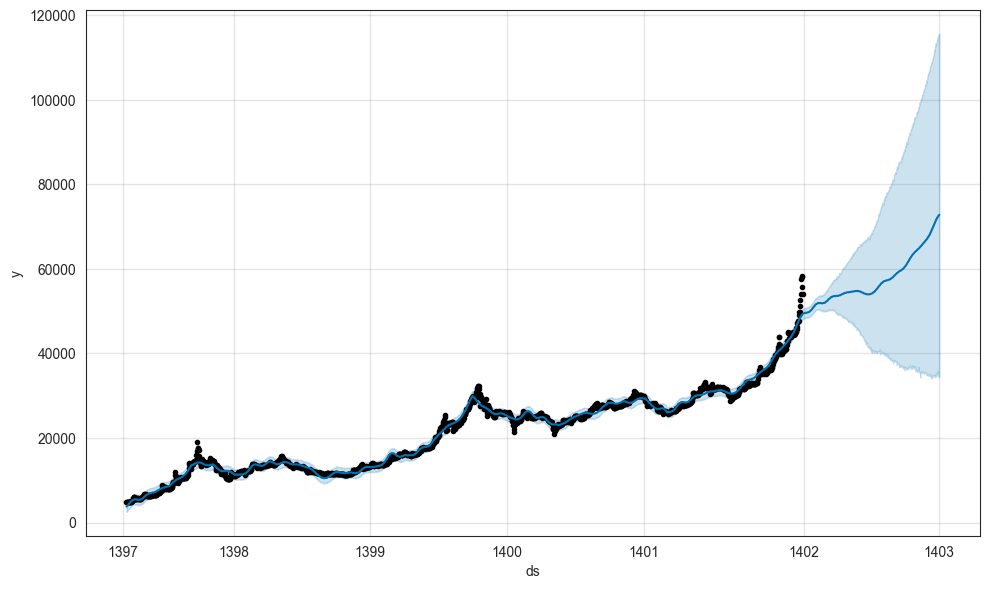

In [214]:
fig=model.plot(future_date)
# Set the x tick labels
xticks = ['1397', '1398', '1399', '1400', '1401', '1402', '1403']
fig.axes[0].set_xticklabels(xticks)
fig.axes[0].set_xticks([17602,17897, 18262,18628,18993,19420, 19780])
# Show the plot
# fig.show()

In [180]:
future_date[future_date['ds'] == '2023-07-09']

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
1936,2023-07-09,54005.698878,47215.057165,62889.931058,46758.242815,62178.313549,560.564999,560.564999,560.564999,-5.037703,-5.037703,-5.037703,565.602701,565.602701,565.602701,0.0,0.0,0.0,54566.263877


In [215]:
future_date.iloc[-1]

ds                            2024-02-29 00:00:00
trend                                69103.754566
yhat_lower                            34562.70152
yhat_upper                          115665.532327
trend_lower                          31060.583481
trend_upper                         112178.944986
additive_terms                        3666.220813
additive_terms_lower                  3666.220813
additive_terms_upper                  3666.220813
weekly                                   2.930623
weekly_lower                             2.930623
weekly_upper                             2.930623
yearly                                 3663.29019
yearly_lower                           3663.29019
yearly_upper                           3663.29019
multiplicative_terms                          0.0
multiplicative_terms_lower                    0.0
multiplicative_terms_upper                    0.0
yhat                                 72769.975378
Name: 2171, dtype: object